# Preliminaries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../../')

import matplotlib.pyplot as plt
import os
from pytorch_lightning import Trainer
from pytorch_lightning.callbacks import Callback

from src.patch_loader import OpenslidePatchLoader
from src.cancer_indicator.patch_mask_preparer import PatchMaskPreparer

In [3]:
img_base_dir = '../../data/panda/images/'
mask_base_dir = '../../data/panda/masks_prep/'
patch_size = 256
batch_size=32
n_patches_per_split = None
max_epochs=100
samples_per_epoch=None
retrain=True

In [4]:
# # for debugging, those values reduce training time
# n_patches_per_split = {
#     'train': 1000,
#     'val': 10,
#     'test': 10,
# }
# samples_per_epoch=batch_size * 10
# max_epochs=5

# # or avoid training altogether:
# retrain=False


In [5]:
pmp = PatchMaskPreparer(
    image_base_dir=img_base_dir,
    mask_base_dir=mask_base_dir,
    patch_size=patch_size,
    mask_filename_suffix="_mask",
    fg_mask_channel=3,
    fg_mask_invert=False,
    label_mask_channel=2,
    label_mask_invert=False,
    mask_downsample_rate=16,
    label_mask_threshold=0.5,
    fg_mask_threshold=0.1,
)

In [6]:
import pandas as pd

experiment_df = pd.read_csv('../../data/panda/metadata.csv', index_col='id_')
experiment_df

,filename,split
id_,,
00e6511435645e50673991768a713c66,00e6511435645e50673991768a713c66.tiff,test
000920ad0b612851f8e01bcc880d9b3d,000920ad0b612851f8e01bcc880d9b3d.tiff,train
004dd32d9cd167d9cc31c13b704498af,004dd32d9cd167d9cc31c13b704498af.tiff,train
00c15b23b30a5ba061358d9641118904,00c15b23b30a5ba061358d9641118904.tiff,test
005e66f06bce9c2e49142536caf2f6ee,005e66f06bce9c2e49142536caf2f6ee.tiff,train
002a4db09dad406c85505a00fb6f6144,002a4db09dad406c85505a00fb6f6144.tiff,train
00ed4dbf9af6cc102e04cc9a42b313e2,00ed4dbf9af6cc102e04cc9a42b313e2.tiff,test
003046e27c8ead3e3db155780dc5498e,003046e27c8ead3e3db155780dc5498e.tiff,train
0076bcb66e46fb485f5ba432b9a1fe8a,0076bcb66e46fb485f5ba432b9a1fe8a.tiff,train


In [7]:
from src.cancer_indicator.masked_patch_datamodule import MaskedPatchDataModule
from src.transforms import ImageTransforms

mpdm = MaskedPatchDataModule(
    image_base_dir=img_base_dir,
    patch_size=patch_size,
    experiment_df=experiment_df,
    patch_mask_preparer=pmp,
    batch_size=batch_size,
    n_patches_per_split=n_patches_per_split,
    samples_per_epoch=samples_per_epoch,
    eval_split=['test'],
)

mpdm.setup('fit')

Removed 0 image/mask pairs. (not found)
Loading Patch Coords from cache...
Loading Uncached Patches: 0it [00:00, ?it/s]Loading Patch Coords from cache...
Loading Uncached Patches: 0it [00:00, ?it/s]
Removed 0 image/mask pairs. (not found)
Loading Patch Coords from cache...
Loading Uncached Patches: 0it [00:00, ?it/s]
Removed 0 image/mask pairs. (not found)
Loading Patch Coords from cache...
Loading Uncached Patches: 0it [00:00, ?it/s]
Loaded coords_df: (21105, 6)
Loaded train_dataset: MaskedPatchDataset(24 image(s), 11569 patch(es) [3159 pos, 8410 neg])
Loaded val_dataset: MaskedPatchDataset(1 image(s), 280 patch(es) [119 pos, 161 neg])


,0
filename,008308f099f0c565fbc024ece6b8b08c.tiff
row,30
col,15
value,1.0
label,1.0
split,train


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


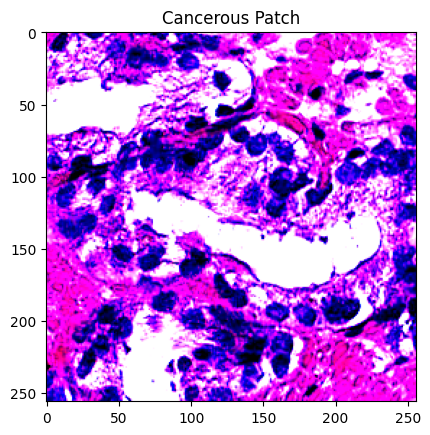

In [8]:
for patches, labels, metadata in mpdm.train_dataloader():
    sample_idx = 0
    patch = patches[sample_idx]
    label = labels[sample_idx]
    metadata_sample = pd.DataFrame(metadata['patch_info']).iloc[sample_idx]

    display(metadata_sample.to_frame())
    plt.imshow(patch.permute(1, 2, 0))

    title = "Cancerous Patch" if label else "Non-cancerous Patch" + " (normalized)"
    plt.title(title)
    break


In [9]:
# It is also possible to check the number of batches
print(len(mpdm.train_dataloader()))

362


# Network

In [10]:
from src.architecture import get_cancer_indicator_net

cancer_indicator_net = get_cancer_indicator_net(
    effnet_kwargs=dict(
        pretrained=True,
    ),
    target_kwargs=dict(
        drop_rate=0.5,
        num_classes=2,
    ),
)
cancer_indicator_net

/home/patrick/.conda/envs/env-pcai/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/patrick/.conda/envs/env-pcai/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Sequential(
  (0): EfficientnetBackbone(
    (backbone_features): Sequential(
      (0): Conv2dNormActivation(
        (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): SiLU(inplace=True)
      )
      (1): Sequential(
        (0): MBConv(
          (block): Sequential(
            (0): Conv2dNormActivation(
              (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
              (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
              (2): SiLU(inplace=True)
            )
            (1): SqueezeExcitation(
              (avgpool): AdaptiveAvgPool2d(output_size=1)
              (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
              (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
              (activation): SiLU(inplace=True)
            

# Training

In [11]:
from src.cancer_indicator.cancer_indicator_litmodule import CancerIndicatorLitModule
from torch.optim import Adam

litmodule = CancerIndicatorLitModule(
    net=cancer_indicator_net,
    optimizer=Adam,
    n_classes=2,
    use_weights=True,
)

In [12]:
class MetricTracker(Callback):

  def __init__(self):
    self.outputs = []

  def on_validation_batch_end(self, trainer, module, outputs, *args):
    self.outputs.append(outputs)

cb = MetricTracker()

trainer = Trainer(
    accelerator="cpu",
    max_epochs=max_epochs,
    num_sanity_val_steps=0,
    callbacks=[cb],
)


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/patrick/.conda/envs/env-pcai/lib/python3.10/site-packages/pytorch_lightning/trainer/setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=2)`.
  rank_zero_warn(


In [13]:
def find_latest_version_checkpoint_path(logs_path='lightning_logs'):

    import os
    from glob import glob
    import pandas as pd

    paths = glob(
        os.path.join(logs_path, '**/*.ckpt'), 
        recursive=True,
    )
    return (
        pd.DataFrame(paths, columns=['filepath'])
        .assign(version=lambda x: x['filepath'].str.extract(r'version_(\d+)').astype(float))
        .sort_values('version')
        .dropna()
        .iloc[-1]
    ).filepath



In [14]:
if retrain:
    trainer.fit(model=litmodule, datamodule=mpdm)
else:
    # get newest checkpoint path from lightning_logs
    path = find_latest_version_checkpoint_path()
    trainer.fit(model=litmodule, datamodule=mpdm, ckpt_path=path)


  | Name      | Type             | Params
-----------------------------------------------
0 | net       | Sequential       | 4.1 M 
1 | criterion | CrossEntropyLoss | 0     
2 | metrics   | ModuleDict       | 0     
-----------------------------------------------
4.1 M     Trainable params
0         Non-trainable params
4.1 M     Total params
16.544    Total estimated model params size (MB)
/home/patrick/.conda/envs/env-pcai/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:224: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 48 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
/home/patrick/.conda/envs/env-pcai/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:224: PossibleUserWarning: The dataloader, val_dataloader 0, does not hav

Training: 0it [00:00, ?it/s]

In [ ]:
if retrain:
    losses = pd.Series([out['loss'] for out in cb.outputs], name='loss', dtype='float32')
    fig, ax = plt.subplots()

    ax.plot(
        losses,
        marker='x',
        color='tab:blue'
    )
    ax.set_xlabel('Step')
    ax.set_ylabel('Loss')

    # only whole numbers on x axis
    ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))

# Predict

In [ ]:
mpdm.setup('predict')
litmodule.eval()

In [ ]:
predictions = CancerIndicatorLitModule.get_predictions_df(
    trainer.predict(model=litmodule, datamodule=mpdm)
)

In [ ]:
nrows = 4
samples_per_group = 8
ncols= 5
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, dpi=300)

for i, ax_col in enumerate(axs.T):
    if i==2:
        for ax in ax_col:
            ax.axis('off')

        continue

    for j, ax in enumerate(ax_col):

        if i < 2:
            tmp_df = predictions.sort_values('prediction').head(samples_per_group)
        elif i > 2:
            tmp_df = predictions.sort_values('prediction').tail(samples_per_group)

        tmp_pred = tmp_df.iloc[i%2::2].iloc[j]

        OpenslidePatchLoader(
            filepath=os.path.join(img_base_dir, tmp_pred.filename),
            patch_size=patch_size,
            channel_is_first_axis=False,
        ).plot_patch(tmp_pred.row, tmp_pred.col, ax=ax)    

        ax.set_title(f"{tmp_pred.prediction:.2f}", fontsize=8)

        tmp_color = 'tab:red' if tmp_pred.label == 1 else 'tab:green'
        for spine in ax.spines.values():
            spine.set_edgecolor(tmp_color)
            spine.set_linewidth(2)
    
plt.tight_layout()